# Capitulo 2 : Distribuciones de Datos y Muestras

## Carga de los datos

In [1]:
# importamos librerias
import pandas as pd
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

In [2]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

Definimos rutas a los conjuntos de datos. Si no mantienes los datos en el mismo directorio que el codigo, adapte los nombres de las rutas

In [3]:
LOANS_INCOME_CSV = DATA / 'loans_income.csv'
SP500_DATA_CSV = DATA / 'sp500_data.csv.gz'

## Distribucion Muestral del Estadistico

Los datos que vamos a utilizar refieren a los ingresos anuales de los solicitantes de prestamos de un Club. Vamos a probar que la distribucion muestral de un estadistico como la Media adopta la forma de campana y que a mientras la muestra sea cada vez mas grande mas estrecha se vuelva tal distribucion

In [4]:
# cargar datos
loans_income = pd.read_csv(LOANS_INCOME_CSV)
loans_income.head()

,x
0,67000
1,52000
2,100000
3,78762
4,37041


Los datos vienen en una columna de un dataframe. Para mayor comodidad en el tratamiento, convertimos los datos en una serie.

In [5]:
# convertir en una serie el dataframe. Debe poseer una columna
loans_income = pd.read_csv(LOANS_INCOME_CSV).squeeze('columns')
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

De los datos tomamos una muestra de 1000 valores que corresponde al ingreso de 1000 solicitantes de prestamo.

In [6]:
# Creamos la muestra de los 1000 valores
sample_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data'
})
sample_data.head()

,income,type
25817,125000,Data
26507,60000,Data
40738,49920,Data
31195,64000,Data
15161,75000,Data


Ahora, creamos una muestra de 1000 medias para 5 valores, es decir, se toman los ingresos de 5 solicitantes aleatorios y se calcula su media, luego se toman los ingresos nuevamente de 5 solicitantes diferentes y se calcula su media. Este paso se repite 1000 veces y se almacenan en un dataframe

In [7]:
# creamos la muestra de 1000 media para 5 valores
sample_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).mean() for _ in range(1000)],
    'type':'Media de 5'
})
sample_mean_05.head()

,income,type
0,55614.2,Media de 5
1,73300.0,Media de 5
2,96200.0,Media de 5
3,73600.0,Media de 5
4,49600.0,Media de 5


Finalmente, creamos una muestra de 1000 media para 20 valores siguiendo el mismo procedimiento anterior. 

In [8]:
# creamos la muestra de 1000 media para 20 valores
sample_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).mean() for _ in range(1000)],
    'type':'Media de 20'
})
sample_mean_20.head()

,income,type
0,57888.2,Media de 20
1,64323.5,Media de 20
2,72449.8,Media de 20
3,65276.1,Media de 20
4,66855.0,Media de 20


In [9]:
# Agrupamos los resultados en un solo df
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

         income  type
25817  125000.0  Data
26507   60000.0  Data
40738   49920.0  Data
31195   64000.0  Data
15161   75000.0  Data


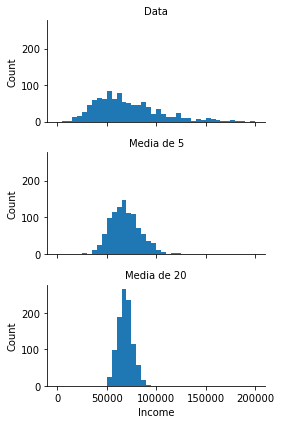

In [10]:
# Graficamos los histogramas
grid = sns.FacetGrid(
    results, 
    col='type', # numero de graficos 
    col_wrap=1, # ordenado en fila(0) o columnas(1)
    height=2,   # ancho de graficos
    aspect=2,   # relacion entra ancho y alto del grafico
) 

# Grafico para cada type
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)
grid.set_axis_labels('Income', 'Count') # titulo de los ejes
grid.set_titles('{col_name}') # titulo de cada grafico
plt.tight_layout();


Ahora, probemos con otra metrica como la Mediana y veamos su distribucion en las diferentes muestras

In [11]:
# Creamos la muestra de los 1000 valores
sample2_data = pd.DataFrame({
    'income':loans_income.sample(1000),
    'type':'Data'
})
sample_data.head()

,income,type
25817,125000,Data
26507,60000,Data
40738,49920,Data
31195,64000,Data
15161,75000,Data


In [12]:
# creamos la muestra de 1000 media para 5 valores
sample2_mean_05 = pd.DataFrame({
    'income':[loans_income.sample(5).median() for _ in range(1000)],
    'type':'Mediana de 5'
})
sample2_mean_05.head()

,income,type
0,97400.0,Mediana de 5
1,80000.0,Mediana de 5
2,40000.0,Mediana de 5
3,56000.0,Mediana de 5
4,73000.0,Mediana de 5


In [13]:
# creamos la muestra de 1000 media para 20 valores
sample2_mean_20 = pd.DataFrame({
    'income':[loans_income.sample(20).median() for _ in range(1000)],
    'type':'Mediana de 20'
})
sample2_mean_20.head()

,income,type
0,62000.0,Mediana de 20
1,69000.0,Mediana de 20
2,66250.0,Mediana de 20
3,80500.0,Mediana de 20
4,52250.0,Mediana de 20


In [14]:
# Agrupamos los resultados en un solo df
results2 = pd.concat([sample2_data, sample2_mean_05, sample2_mean_20])
print(results2.head())

         income  type
16975   16000.0  Data
5905    40000.0  Data
13207   95100.0  Data
3900   105000.0  Data
22461   84000.0  Data


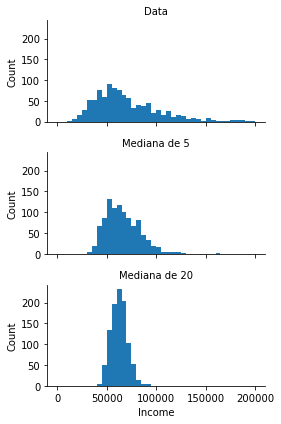

In [15]:
# Graficamos los histogramas
grid = sns.FacetGrid(
    results2, 
    col='type', # numero de graficos 
    col_wrap=1, # ordenado en fila(0) o columnas(1)
    height=2,   # ancho de graficos
    aspect=2,   # relacion entra ancho y alto del grafico
) 

# Grafico para cada type
grid.map(plt.hist, 'income', range=[0, 200000], bins=40)
grid.set_axis_labels('Income', 'Count') # titulo de los ejes
grid.set_titles('{col_name}') # titulo de cada grafico
plt.tight_layout();

Vemos el mismo resultado obtenido al utilizar la media

## Bootstrap

Vamos a estimar la mediana y su variabilidad para los ingresos de los clientes que solicitan un prestamo

In [16]:
# importamos libreria para el remuestreo
from sklearn.utils import resample

In [17]:
# creamos una lista donde guardamos los resultados
results = []

# numero de iteraciones de bootstrap: 1000
for R in range(1000):
    # tomamos una muestra con reposicion de los datos
    sample = resample(loans_income)
    # calculamos la mediana de la muestra y guardamos el resultado
    results.append(sample.median())

# convertimos la lista con los resultados en una serie
results = pd.Series(results)

# imprimimos los resultados
print('Estadistica del Bootstrap')
print(f'Mediana Original: {loans_income.median()}')
print(f'Sesgo: {results.mean() - loans_income.median()}')
print(f'Error Estandar: {results.std()}')

Estadistica del Bootstrap
Mediana Original: 62000.0
Sesgo: -80.06300000000192
Error Estandar: 230.18540429695085


Que resultados obtendriamos si variamos R? Probemos con R = 100

In [18]:
# creamos una lista donde guardamos los resultados
results = []

# numero de iteraciones de bootstrap: 1000
for R in range(100):
    # tomamos una muestra con reposicion de los datos
    sample = resample(loans_income)
    # calculamos la mediana de la muestra y guardamos el resultado
    results.append(sample.median())

# convertimos la lista con los resultados en una serie
results = pd.Series(results)

# imprimimos los resultados
print('Estadistica del Bootstrap')
print(f'Mediana Original: {loans_income.median()}')
print(f'Sesgo: {results.mean() - loans_income.median()}')
print(f'Error Estandar: {results.std()}')

Estadistica del Bootstrap
Mediana Original: 62000.0
Sesgo: -64.99500000000262
Error Estandar: 205.536701913146


En este caso, vemos como el sesgo aumenta es decir, los datos tienden a estar mas esparcidos. Ahora probemos con un R de 10.000

In [19]:
# creamos una lista donde guardamos los resultados
results = []

# numero de iteraciones de bootstrap: 1000
for R in range(10000):
    # tomamos una muestra con reposicion de los datos
    sample = resample(loans_income)
    # calculamos la mediana de la muestra y guardamos el resultado
    results.append(sample.median())

# convertimos la lista con los resultados en una serie
results = pd.Series(results)

# imprimimos los resultados
print('Estadistica del Bootstrap')
print(f'Mediana Original: {loans_income.median()}')
print(f'Sesgo: {results.mean() - loans_income.median()}')
print(f'Error Estandar: {results.std()}')

Estadistica del Bootstrap
Mediana Original: 62000.0
Sesgo: -76.40385000000242
Error Estandar: 218.3900255288859


Vemos que el sesgo disminuye a medida que aumentamos R, esto prueba lo dicho en la teoria sobre la cantidad de remuestreo que se requiere segun la precision que se desea.

## Intervalos de Confianza

Vamos a estimar un intervalo de confianza del 90% para el ingreso anual medio de los solicitantes de prestamos, basados en una muestra de 20 solicitantes aleatorios, con la cual se generan 500 muestras bootstrap cuya media ha sido de 55.734$

In [20]:
# imprime la media de los ingresos anuales de toda la muestra
print(loans_income.mean())

68760.51844


In [21]:
# fijar una semilla aleatoria para asegurar la reproducibilidad de los datos
import numpy as np
np.random.seed(seed=3)

In [22]:
# Crear una muestra aleatoria sin reemplazo de 20 ingresos de la muestra completa
sample20 = resample(loans_income, n_samples=20, replace=False)
sample20

35437     54000
16296     25000
23122     75000
9436      56000
11959    116262
3313      85000
49651     13000
2837      60000
46465     54000
26004     30000
42728    160000
26264     83300
17830     34000
8283      47000
24455     24000
24094     31000
12649     26000
46661     25000
37609     21120
10439     95000
Name: x, dtype: int64

In [23]:
# imprime la media de la muestra aleatoria de 20 ingresos
sample20.mean()

55734.1

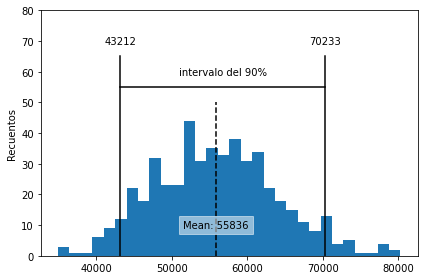

In [24]:
# creamos lista para almacenar las medias de las muestras bootstrap
results = []

# generar 500 muestras bootstrap
for R in range(500):
    # crea una muestra bootstrap de la muestra aleatoria de 20 ingresos
    sample = resample(sample20)
    # agrega la media de la muestra bootstrap a la lista
    results.append(sample.mean())
# Convierte la lista en una Serie
results = pd.Series(results)

# calcular los cuantiles 5 y 95 para estimar el intervalo de confianza del 90% para la
# media de los ingresos
intervalo_conf = list(results.quantile([0.05, 0.95]))
# histograma con las medias de las muestras bootstrap
ax = results.plot.hist(bins=30, figsize=(6, 4))
# linea horizontal que representa el intervalo de confianza del 90%
ax.plot(intervalo_conf, [55, 55], color='black')

# itera sobre cada cuantil en el intervalo de confianza
for x in intervalo_conf:
    # linea vertical para cada cuantil
    ax.plot([x, x], [0, 65], color='black')
    # etiqueta el valor de cada cuantil
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
    # etiqueta el intervalo de confianza
ax.text(sum(intervalo_conf) / 2, 60, 'intervalo del 90%',
        horizontalalignment='center', verticalalignment='center')

# calcula la media de las medias de las muestras bootstrap
meanIncome = results.mean()
# linea vertical punteada que representa la media de las medias de las muestras bootstrap
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
# etiqueta la media de las medias 
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')

# establece el limite del eje Y
ax.set_ylim(0, 80)
# etiqueta del eje Y
ax.set_ylabel('Recuentos')
# ajusta el grafico a la figura
plt.tight_layout();

Ahora, vamos a estimar un intervalo de confianza del 95% para el ingreso anual medio de los solicitantes de prestamos

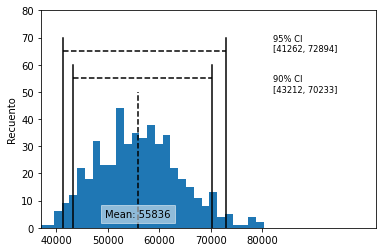

In [25]:
# fijar una semilla aleatoria para asegurar la reproducibilidad de los datos
np.random.seed(seed=3)

# Crear una muestra aleatoria sin reemplazo de 20 ingresos de la muestra completa
sample20 = resample(loans_income, n_samples=20, replace=False)

# creamos lista para almacenar las medias de las muestras bootstrap
results = []
# generar 500 muestras bootstrap
for nrepeat in range(500):
    # crea una muestra bootstrap de la muestra aleatoria de 20 ingresos
    sample = resample(sample20)
    # agrega la media de la muestra bootstrap a la lista
    results.append(sample.mean())
# Convierte la lista en una Serie    
results = pd.Series(results)

# calcular los cuantiles 5 y 95 para estimar el intervalo de confianza del 90% para la
# media de los ingresos
intervalo_conf = list(results.quantile([0.05, 0.95]))
# histograma con las medias de las muestras bootstrap
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
# línea punteada horizontal para representar el intervalo de confianza del 90%.
ax.plot(intervalo_conf, [55, 55], color='black', linestyle='--')

# iterar sobre cada cuantil calculado en el intervalo de confianza anterior
for x in intervalo_conf:
    # linea vertical para cada cuantil
    ax.plot([x, x], [0, 60], color='black')
# etiqueta del intervalo de confianza del 90%
ax.text(82000, 50, 
        f'90% CI\n[{intervalo_conf[0]:.0f}, {intervalo_conf[1]:.0f}]',
       fontsize='small')

# calcular los cuantiles 2.5 y 97.5 para estimar el intervalo de confianza del 95% 
# para la media de los ingresos
intervalo_conf = list(results.quantile([0.025, 0.975]))
# Histograma con las medias de las muestras bootstrap
ax = results.plot.hist(bins=30, figsize=(6, 4))
# línea punteada horizontal para representar el intervalo de confianza del 95%.
ax.plot(intervalo_conf, [65, 65], color='black', linestyle='--')

# iterar sobre cada cuantil calculado en el intervalo de confianza anterior
for x in intervalo_conf:
    # linea vertical para cada cuantil
    ax.plot([x, x], [0, 70], color='black')
# etiqueta del intervalo de confianza del 95%    
ax.text(82000, 65, 
        f'95% CI\n[{intervalo_conf[0]:.0f}, {intervalo_conf[1]:.0f}]',
       fontsize='small')

# Calculo de la media de las medias de las muestras bootstrap
meanIncome = results.mean()
# linea vertical punteada que representa la media de las medias de las muestras bootstrap
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
# etiqueta la media de las medias
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
# Se establece el límite del eje y del gráfico.
ax.set_ylim(0, 80)
# Se establece el límite del eje x del gráfico.
ax.set_xlim(37000, 102000)
# Se establecen los ticks del eje x del gráfico.
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
# Etiqueta del eje Y
ax.set_ylabel('Recuento');


## Distribucion Normal

### Diagrama Q-Q
Vamos a crear un diagrama Q-Q para una muestra de 100 valores generados aleatoriamente a partir de una distribucion normal. Esta diagrama compara los cuantiles de la muestra de datos con los cuantiles de una distribucion teorica (en este caso, la distribucion normal). Si los puntos en el grafico siguen aproximadamente una linea recta, entonces los datos siguen la distribucion teorica.

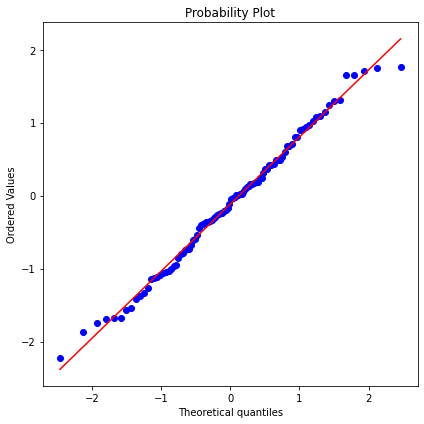

In [28]:
# libreria para el diagrama Q-Q
from scipy import stats

# tamano de la grafica
fig, ax = plt.subplots(figsize=(6,6))

# muestra de 100 valores obtenidos aleatoriamente de una distribucion normal
muestra_normal = stats.norm.rvs(size=100)

# diagrama Q-Q
stats.probplot(muestra_normal, plot=ax)
plt.tight_layout();

### Distribucion de cola larga
Vamos a crear un diagrama Q-Q de la rentabilidad diaria de las acciones de Netflix 

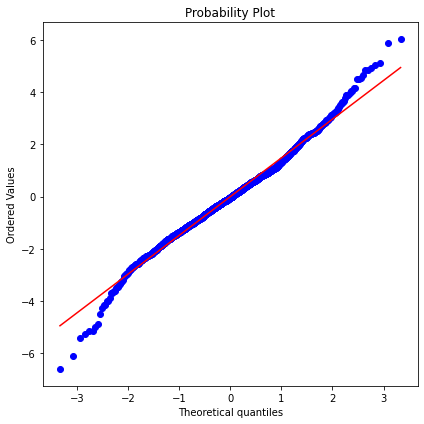

In [33]:
# cargamos los datos del S&P 500
sp500_px = pd.read_csv(SP500_DATA_CSV)

# extraemos los precios de cierre de las acciones de Netflix
nflx = sp500_px.NFLX

# filtramos los precios de las acciones para omitir valores negativos y ceros
# calculamos el logaritmo de los precios y la diferencia entre los retornos sucesivos
# lo cual arroja una serie de tiempo de los cambios porcentuales de las acciones
nflx =np.diff(np.log(nflx[nflx > 0]))

# diagrama Q-Q
fig, ax = plt.subplots(figsize=(6,6))
stats.probplot(nflx, plot=ax)
plt.tight_layout();

Vemos que los puntos estan muy por debajo de la linea para valores bajos y muy por encima de la linea para valores altos, lo que indica que los datos no estan distribuidos normalmente.